<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_21_Regresi%C3%B3n_Lineal_Simple_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Isidro Jesús González Hernández
*   Matrícula:261550

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.

# **Parte 1: Carga de datos y bibliotecas**

1. Importa las bibliotecas necesarias.

2. Carga el archivo restaurantes.csv.

3. Muestra las primeras filas del dataframe.

4. Describe estadísticamente el conjunto de datos.

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233





Descripción estadística del dataset:
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None




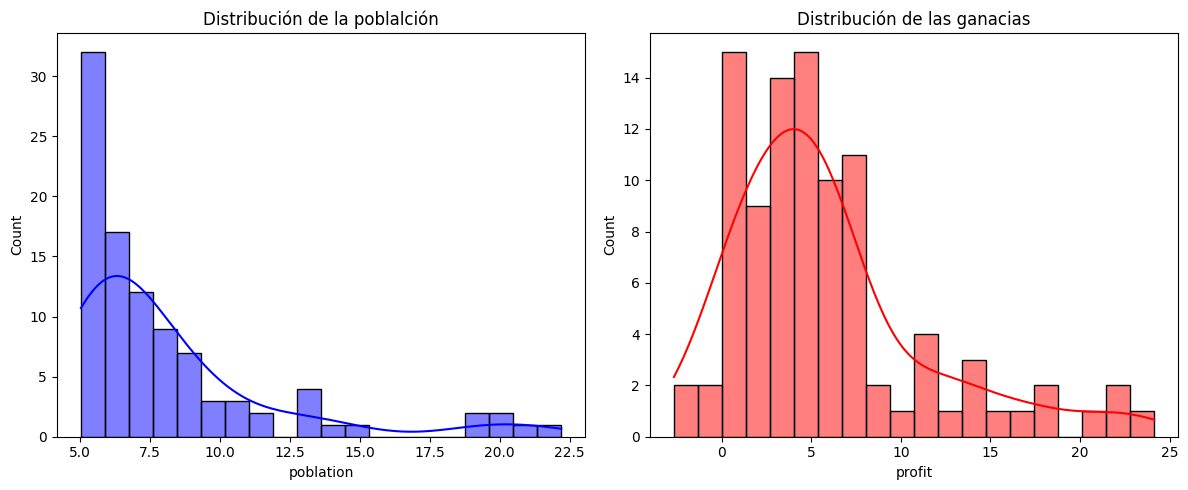

In [68]:
# 1. Importa las bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

# 2. Carga el archivo `restaurantes.csv`
df = pd.read_csv('/content/drive/MyDrive/1_ClassFiles/17_Clase 10-10-2025/Práctica 21 Regresión Lineal Simple/restaurantes.csv')

#3. Muestra las primeras filas del dataframe.
display(HTML("<h3 style='color:blue; font-size:18px;'> Información del dataframe </h3>"))
print(df.head())

print('\n')

# 4. Describe estadísticamente el conjunto de datos.
display(HTML("<h3 style='color:blue; font-size:18px;'> Descripción estadística del dataset </h3>"))

print("\nDescripción estadística del dataset:")
print(df.describe())

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Valores nulos y tipos de datos </h3>"))
print(df.info())

print('\n')
display(HTML("<h3 style='color:blue; font-size:18px;'> Distribución de las variables 'poblation' y 'profit' </h3>"))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para la columna poblation
sns.histplot(df['poblation'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de la poblalción")

# Histograma para la columna profit
sns.histplot(df['profit'], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Distribución de las ganacias")

plt.tight_layout()
plt.show()


**En la descripción estadística del dataset se identificaron valores negativos en la variable "profit", por lo que se decidió eliminar los valores negativos de profit y su respectivo valor de poblation para realizar el análisis de la regresión lineal. Esta decisión se toma, ya que, se está analizando el concepto de ganancias.**

In [69]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Filas eliminadas por profit menor que cero 'profit' </h3>"))
print('\n')

mask = (df['profit'] >= 0) & (df['poblation'] >= 0)  # si NO quieres filtrar poblation, usa solo (df['profit'] >= 0)
removed = (~mask).sum()

df_limpio = df.loc[mask].copy()
df_limpio.reset_index(drop=True, inplace=True)

print(f"Filas eliminadas por profit<0 (y/o poblation<0): {removed}")
print(f"Shape original: {df.shape}  ->  Shape limpio: {df_limpio.shape}")



Filas eliminadas por profit<0 (y/o poblation<0): 4
Shape original: (97, 2)  ->  Shape limpio: (93, 2)



Descripción estadística del dataset:
       poblation     profit
count  93.000000  93.000000
mean    8.276162   6.155491
std     3.909356   5.404394
min     5.036500   0.144540
25%     5.729200   2.475600
50%     7.003200   4.885200
75%     8.825400   7.202900
max    22.203000  24.147000




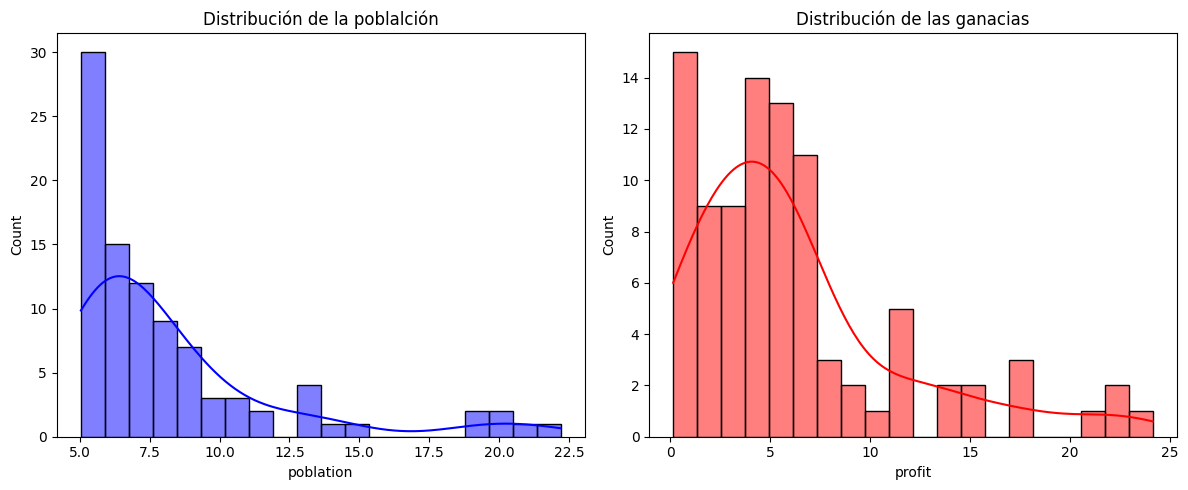

In [70]:
# 4. Describe estadísticamente el conjunto de datos.
display(HTML("<h3 style='color:blue; font-size:18px;'> Descripción estadística del nuevo dataset </h3>"))

print("\nDescripción estadística del dataset:")
print(df_limpio.describe())

print('\n')
display(HTML("<h3 style='color:blue; font-size:18px;'> Distribución de las variables 'poblation' y 'profit' del nuevo dataset </h3>"))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para la columna poblation
sns.histplot(df_limpio['poblation'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de la poblalción")

# Histograma para la columna profit
sns.histplot(df_limpio['profit'], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Distribución de las ganacias")

plt.tight_layout()
plt.show()


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

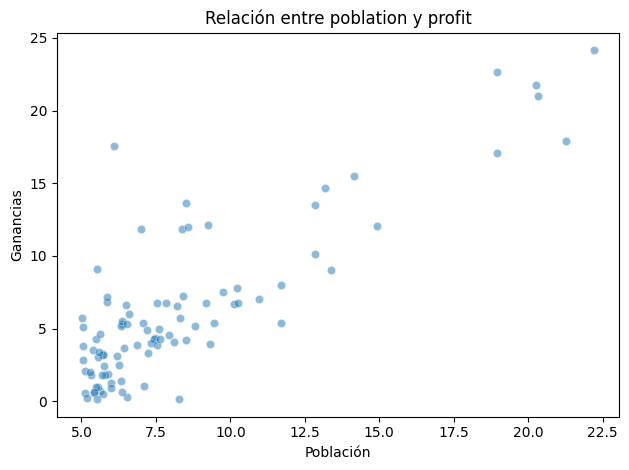

In [71]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Diagrama de Dispersión </h3>"))

sns.scatterplot(x=df_limpio['poblation'], y=df_limpio['profit'], alpha=0.5)
plt.title(f"Relación entre poblation y profit")
plt.xlabel("Población")
plt.ylabel("Ganancias")

plt.tight_layout()
plt.show()

**¿La relación entre las variables parece lineal? ¿Por qué?**

Sí, la relación entre las variables parece lineal y positiva, ya que los puntos siguen una tendencia ascendente, es decir, conforme aumenta la población, también tienden a incrementarse las ganancias. Sin embargo, se puede percibir una dispersión en los datos, es decir, no todos los puntos se encuentran en la línea de regresión.

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

El coeficiente de correlación de Pearson es: 0.8395572410205765




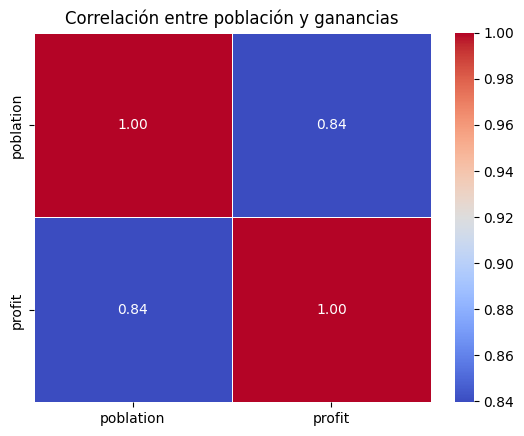

In [72]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Coeficiente de Correlación de Pearson </h3>"))

correlation_matrix = df_limpio.corr()

# Extraer el valor de correlación específico entre 'population' y 'profit'
pearson_correlation = correlation_matrix.loc['poblation', 'profit']

print(f"El coeficiente de correlación de Pearson es: {pearson_correlation}")
print('\n')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlación entre población y ganancias")
plt.show()

**1. ¿Qué tan fuerte es la relación?**

El resultado de la correlación de Pearson (0.8395) nos indica que la relación entre las variables es fuerte, es decir, que las ganacias del restaurante estan asocidas con la cantidad de gente que existe en la ciudad.  

**2. ¿Es positiva o negativa?**

La literatura indica que la correlación de Pearson puede dar valores positivos y negativos, además de cero. En este sentido el resultado fue positivo, es decir existe una relación positiva (directa) entre las variables de estudio; si incrementa la población van a incrementar las ganancias del restaurante, si disminuye la población, disminuirán las ganancias.


**4. ¿Es coherente con el gráfico anterior?**

Si, es coherente con la grafica de dispersión de los datos, la correlación nos da un valor positivo y los puntos de la gráfica siguen una tendencia ascendente.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [73]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Construcción del modelo de Regresión Lineal Simple </h3>"))

from sklearn.linear_model import LinearRegression

X = df_limpio[['poblation']]   # n x 1
y = df_limpio['profit']

model = LinearRegression()
model.fit(X, y)


coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# R² ajustada (p = 1 predictor)
n = len(y)
p = 1
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Modelo:")
print(f"y = {intercept:.6f} + ({coef:.6f}) * x")


display(HTML("<h3 style='color:blue; font-size:18px;'>  Intercepto y el coeficiente de la regresión (pendiente) </h3>"))

print("\nParámetros:")
print(f"coeficiente de la regresión (β1): {coef:.6f}")
print(f"Intercepto (β0): {intercept:.6f}")
print(f"R²: {r2:.4f}")
print(f"R² ajustada: {r2_adj:.4f}")

Modelo:
y = -3.450034 + (1.160625) * x



Parámetros:
coeficiente de la regresión (β1): 1.160625
Intercepto (β0): -3.450034
R²: 0.7049
R² ajustada: 0.7016


**3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?**

Con base en la literatura el intercepto establece el punto de partida de la línea de regresión en el eje Y. Es decir, representa el valor de la variable dependiente (Y) cuando la variable independiente (X) es cero. En el contexto de los datos significaría que los ingresos que se van a obtener cunado la población sea cero es de -3.450034. Sin embargo, no es lógico ese resultado, ya que, no existiría ningún restaurante con población cero.  




**4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?**

Con base en la literatura, el coeficiente de correlación (pendiente) indica cuánto se espera que cambie la variable dependiente (Y) con un aumento de una unidad en la variable independiente (X). Una pendiente positiva sugiere una relación positiva, en la que la variable dependiente aumenta a medida que aumenta la variable independiente. Una pendiente negativa indica lo contrario. En este sentido, el coeficiente nos dio un valor de 1.1606: por cada 1 unidad de poblation, el profit esperado aumenta 1.16.

### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

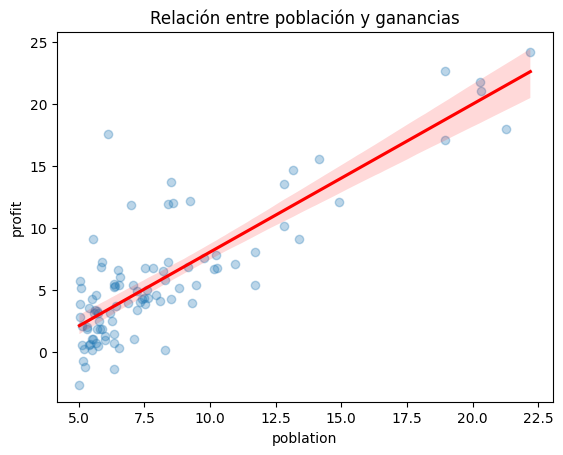

In [74]:
sns.regplot(x=df['poblation'], y=df['profit'], scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
plt.title(f"Relación entre población y ganancias")
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

In [75]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Residuos (reales - predichos) </h3>"))

# 1) Residuos
y_pred = model.predict(X)
residuos = y - y_pred
print(residuos)

0     13.950496
1      6.164644
2      7.225129
3      7.175941
4      3.472300
        ...    
88     3.839250
89    -0.720649
90    -6.030958
91    -3.040284
92    -2.243121
Name: profit, Length: 93, dtype: float64


/tmp/ipython-input-3372651883.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


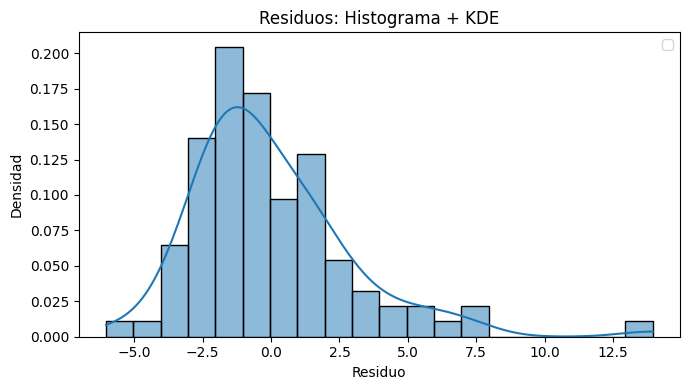

In [76]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Grafica un histograma con KDE de los residuos </h3>"))
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(7,4))
sns.histplot(residuos, bins=20, stat='density', kde=True, edgecolor='black')
plt.title("Residuos: Histograma + KDE")
plt.xlabel("Residuo"); plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

**¿Los residuos siguen una distribución normal?**


De acuerdo al comportamiento del histograma los residuos no se ajustan a una distribución normal, se presenta un sesgo a la derecha. Sin embargo se tendría que hacer una prueba de normalidad para verificar la afirmación de que no siguen una distribución normal.   

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

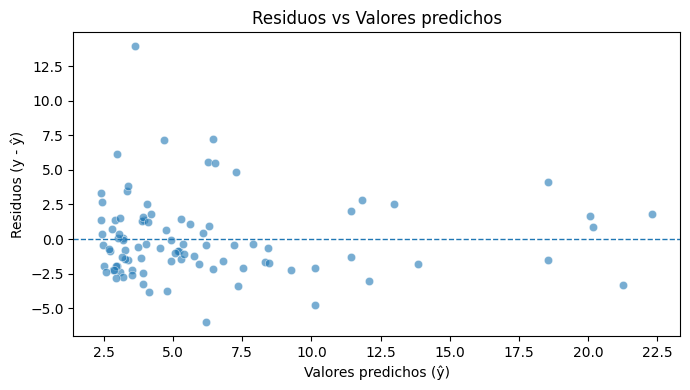



Breusch–Pagan p-value: 0.7676  ->  El valor de p es maoy a 0.5 por lo que se asume Homocedasticidad
White test p-value:    0.9182  ->  El valor de p es maoy a 0.5 por lo que se asume Homocedasticidad
Durbin–Watson: 0.986 (≈2 independencia; <2 autocorrelación positiva)


In [77]:
# --- Imports necesarios ---
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from IPython.display import display, HTML

display(HTML("<h3 style='color:blue; font-size:18px;'> 4.2 Homocedasticidad </h3>"))

y_pred = model.predict(X)
res = y - y_pred  # residuos

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred, y=res, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos")
plt.xlabel("Valores predichos (ŷ)")
plt.ylabel("Residuos (y - ŷ)")
plt.tight_layout()
plt.show()

print('\n')

exog = sm.add_constant(X, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(res, exog)
white_stat, white_pvalue, _, _ = het_white(res, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es maoy a 0.5 por lo que se asume Homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es maoy a 0.5 por lo que se asume Homocedasticidad'}")

dw = sm.stats.stattools.durbin_watson(res)
print(f"Durbin–Watson: {dw:.3f} (≈2 independencia; <2 autocorrelación positiva)")

**¿Los residuos están distribuidos aleatoriamente o muestran un patrón?**

Los residuos se ubican principalmente entre -5.0 y 2.5, con mayor frecuencia entre -5.0 y 0, lo que confirma asimetría, es decir, no hay normalidad. Las pruebas de Breusch-Pagan (p=0.7676) y White (p=0.9182) no rechazan la homocedasticidad, por lo que la varianza de los errores puede considerarse constante. En consecuencia, el supuesto de homocedasticidad es razonable para este modelo.  

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

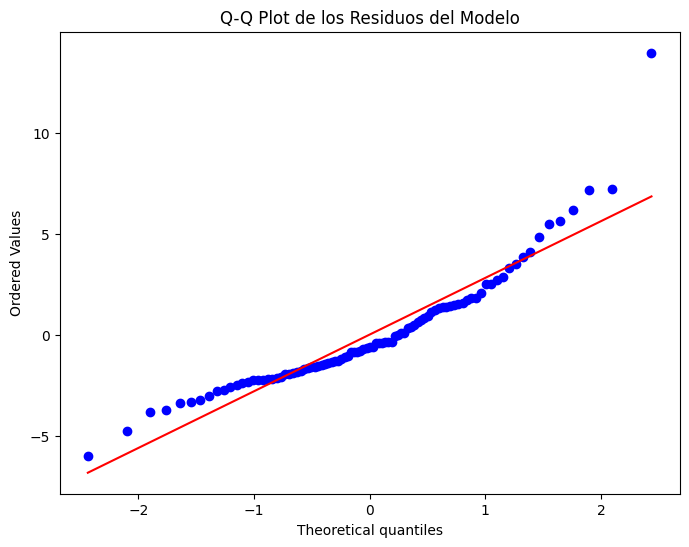

Media: 0.000, Desviación estándar: 2.936
Shapiro–Wilk: estadístico = 0.89528, p-valor = 0.00000
D’Agostino–Pearson: estadístico = 42.37216, p-valor = 0.00000
Kolmogorov–Smirnov: estadístico = 0.12732, p-valor = 0.08975


In [78]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad </h3>"))

residuos = y - y_pred

plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo")
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos </h3>"))

# Pruebas de normalidad
print(f"Media: {residuos.mean():.3f}, Desviación estándar: {residuos.std():.3f}")

# Shapiro–Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro–Wilk: estadístico = {shapiro_test.statistic:.5f}, p-valor = {shapiro_test.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test = stats.normaltest(residuos)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test.statistic:.5f}, p-valor = {dagostino_test.pvalue:.5f}")

# Kolmogorov–Smirnov (con parámetros estimados)
z = (residuos - residuos.mean()) / residuos.std(ddof=1)
ks_test = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test.statistic:.5f}, p-valor = {ks_test.pvalue:.5f}")


**Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.**


Como se puede observar en la gráfica los puntos no se alienan correctamente a la línea recta de referencia, la cual representa los cuantiles de la distribución teórica (distribución normal) que se está comparando. Además, los resultados del valor de p de los estadísticos de Shapiro-Wilk, D'Agostino-Pearson y Kolmogorov-Smirnov nos indican que los residuos no se ajustan a una distribución normal.   

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [79]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Calcular las métricas del modelo </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 13. Calcular las métricas del modelo
mse = mean_squared_error(y, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, y_pred)  # Error absoluto medio
r2 = r2_score(y, y_pred)  # Coeficiente de determinación R^2

# 14. Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 8.5277
Raíz del Error Cuadrático Medio (RMSE): 2.9202
Error Absoluto Medio (MAE): 2.1476
Coeficiente de Determinación (R²): 0.7049


**Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?**

Con base en el resultado del coeficiente de determinación (R²): 0.7049, nos indica que el modelo de regresión explica casi el 70% de la variabilidad de las ganancias (profit). Es decir, el modelo de regresión representa un ajuste moderado-alto para un modelo simple donde se considera un solo predictor. Por otra parte, el otro 30% el modelo no puede explicar la variabilidad de las ganancias, es decir ese 30% se puede deber a otras variables que influyen en las ganancias del restaurante.

## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

**¿Qué tan útil consideras el modelo?**

Considero que el modelo de regresión lineal simple es útil cuando se quiere predecir el comportamiento de un proceso o sistema cuando no se tiene mucha información de las variables que influyen directa y fuertemente en lo que se quiere analizar o predecir. Por ejemplo, cuando se establece una nueva empresa y quiere pronosticar la demanda de su producto, sólo tiene información de las ventas diarias de ese producto, aun no cuenta con más información de las variables que influyen en la decisión de comprar dicho producto.  

**¿Qué limitaciones encuentras?**

Uno de los detalle que note fue en el intercepto en donde fue un valor negativo, si x tomara un valor de cero, las ganancias serían de -3.450034, lo que no suena lógico, ya que, se esta analizando ganancias.   

**¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes? Si crees que es necesario hacerlo realiza el ajuste.**

Dado que no hay normalidad de residuos, se recomienda un ajuste por transformación de la variable dependiente: log(y).

In [80]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Modelo de regresión lineal con estandarización de variables </h3>"))

scaler = StandardScaler()
x_estand = pd.DataFrame(scaler.fit_transform(df_limpio[['poblation']]),
                     columns=['poblation_z'], index=df_limpio.index)

modelo_estand = LinearRegression().fit(x_estand, y)
y_pred_estand = modelo_estand.predict(x_estand)


print("Modelo:")
print(f"y = {modelo_estand.intercept_:.4f} + ({modelo_estand.coef_[0]:.4f}) * x")

mse_std = mean_squared_error(y, y_pred_estand)
rmse_std = np.sqrt(mse_std)
mae_std = mean_absolute_error(y, y_pred_estand)
r2_std  = r2_score(y, y_pred_estand)
nn=len(y_pred_estand)
pp=1
r2_adju = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print("\nParámetros:")
print(f"coeficiente de la regresión (β1): {modelo_estand.coef_[0]:.4f}")
print(f"Intercepto (β0): {modelo_estand.intercept_:.4f}")
print(f"R²: {r2:.4f}")
print(f"R² ajustadda: {r2_adju:.4f}")

Modelo:
y = 6.1555 + (4.5128) * x

Parámetros:
coeficiente de la regresión (β1): 4.5128
Intercepto (β0): 6.1555
R²: 0.7049
R² ajustadda: 0.7016


**No se observa ningún cambio en los valores de R, es decir aun con la estandarización el modelo de regresión lineal sigue explicando sólo el 70% de la variabilidad de las ganancias (profit).**